In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

%matplotlib inline        #Have matplotlib output show up in notebook

import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv(StringIO(data_csv)) #Read in the data

In [73]:
data.keys()

Index([u'Season', u'Name', u'Female?', u'Current Residence', u'From location?',
       u'California', u'Georgia', u'Texas', u'Florida', u'New York',
       u'Colorado', u'Washington', u'Pennsylvania', u'Boston', u'Miami', u'DC',
       u'LA', u'NYC', u'Seattle', u'SF', u'Las Vegas', u'Chicago', u'Age',
       u'Quickfire Performance', u'Elimination 1 Performance',
       u'Previous Contestant', u'Elimination #', u'Target\n'],
      dtype='object')

In [7]:
#Features used to predict target, the overall elimination order

initial_features= ['Season', 'Female?', 'From location?',
       'California', 'Georgia', 'Texas', 'Florida', 'New York',
       'Colorado', 'Washington', 'Pennsylvania', 'Boston', 'Miami', 'DC',
       'LA', 'NYC', 'Seattle', 'SF', 'Las Vegas', 'Chicago', 'Age',
       'Quickfire Performance', 'Elimination 1 Performance',
       'Previous Contestant'];

In [8]:
features = data[initial_features]

In [484]:
#Set up testing and training datasets

training_features = features[(features['Season']!=13)&(features['Season']!=14)]
training_features = training_features.fillna(30) #Sometimes age is missing, doesn't really matter

In [485]:
testing_features = features[(features['Season']==13)]
testing_features = testing_features.fillna(30) #Sometimes age is missing, doesn't really matter

In [486]:
training_target = data[(data['Season']!=13)&(data['Season']!=14)]['Target\n']

In [487]:
testing_target = data[(data['Season']==13)]['Target\n']

In [488]:
#Train a gradient boosted regressor (parameters have been optimized by the validation set)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=2, random_state=0, loss='huber',
                               min_samples_leaf=1,min_samples_split=3)
est = gbr.fit(training_features, training_target)

In [489]:
#See how the prediction did

preds = est.predict(testing_features)
print np.where(preds==min(preds))
print np.where(testing_target==min(testing_target))

(array([4]),)
(array([4]),)


In [490]:
print (np.argsort(preds)== np.array(np.argsort(testing_target))).sum()
print np.array(np.argsort(preds))
print np.array(np.argsort(testing_target))

2
[ 4  9  2  0  6 16  3 11 13 14  8 15  7 12  1 10  5]
[ 4  9 13  7  2  8  0  6 16 11 14  1 15 10 12  5  3]


In [491]:
np.linalg.norm(preds-np.array(testing_target))

0.93421425529339386

In [497]:
#Take out one feature at a time to see which features are most important

for key in training_features.keys():
    train_feat = training_features.drop(key,axis=1);
    test_feat = testing_features.drop(key,axis=1);
    est = gbr.fit(train_feat,training_target);
    preds = est.predict(test_feat);
    print key
    print (np.where(preds==min(preds))==np.where(testing_target==min(testing_target)))
    print np.linalg.norm(preds-np.array(testing_target))
    print '\n'

Season
False
1.03312785492


Female?
True
0.985202024597


From location?
True
0.975842884057


Boston
True
0.967791251689


Chicago
True
0.933583213578


Elimination 1 Performance
False
1.28585702878


California
True
0.952828687096


Previous Contestant
True
0.934234955854




In [9]:
#These are the best features identified

good_features = ['Season', 'Female?', 'From location?',
        'Boston', 'Chicago', 'Elimination 1 Performance','California']

In [460]:
#Add one feature at a time to see if adding more features significantly affects performance

for key in initial_features:
    
    if key not in good_features:
    
        features = data[good_features+[key]]
        
        training_features = features[(features['Season']!=13)&(features['Season']!=14)]
        training_features = training_features.fillna(30)
        
        testing_features = features[(features['Season']==13)]
        testing_features = testing_features.fillna(30)
    
        testing_target = data[(data['Season']==13)]['Target\n']
    
        train_feat = training_features.drop(key,axis=1);
        test_feat = testing_features.drop(key,axis=1);
        est = gbr.fit(train_feat,training_target);
        preds = est.predict(test_feat);
        print key
        print (np.where(preds==min(preds))==np.where(testing_target==min(testing_target)))
        print np.linalg.norm(preds-np.array(testing_target))
        print '\n'

Georgia
True
0.934234955854


Texas
True
0.934234955854


Florida
True
0.934234955854


New York
True
0.934234955854


Colorado
True
0.934234955854


Washington
True
0.934234955854


Pennsylvania
True
0.934234955854


Miami
True
0.934234955854


DC
True
0.934234955854


LA
True
0.934234955854


NYC
True
0.934234955854


Seattle
True
0.934234955854


SF
True
0.934234955854


Las Vegas
True
0.934234955854


Age
True
0.934234955854


Quickfire Performance
True
0.934234955854


Previous Contestant
True
0.934234955854




In [534]:
features = data[good_features]

In [535]:
#Retrain using the selected features for season 14

training_features = features[(features['Season']!=14)]
training_features = training_features.fillna(30)

In [536]:
training_target = data[(data['Season']!=14)]['Target\n']

In [537]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=2, random_state=0, loss='huber',
                               min_samples_leaf=1,min_samples_split=3)
est = gbr.fit(training_features, training_target)

In [538]:
prediction_features = features[(features['Season']==14)]
prediction_features = prediction_features.fillna(30)

In [555]:
preds = gbr.predict(prediction_features)

In [556]:
preds #Print ultimate predictions

array([ 0.65735558,  0.69030183,  0.61610193,  1.00537115,  0.58315569,
        0.58315569,  0.58315569,  0.58315569,  0.62406305,  0.35183443,
        0.27097819,  0.36974013,  0.26868784,  0.27097819,  0.19800267,
        0.35183443])

In [68]:
#Visualize how the data clusters

cluster_features = data[data['Season']<14][good_features].drop('Season',axis=1)
cluster_colors = data[data['Season']<14]['Target\n']

In [69]:
pca = PCA(n_components=2)
pca.fit(cluster_features)

PCA(copy=True, n_components=2, whiten=False)

In [70]:
print(pca.components_) 
print(pca.explained_variance_ratio_) 

[[-0.00635194  0.02095994  0.00445453  0.01583081  0.9994605  -0.018127  ]
 [-0.99750311  0.00311282 -0.03932194 -0.05495394 -0.00500245  0.01966398]]
[ 0.79307056  0.07983632]


([], <a list of 0 Text yticklabel objects>)

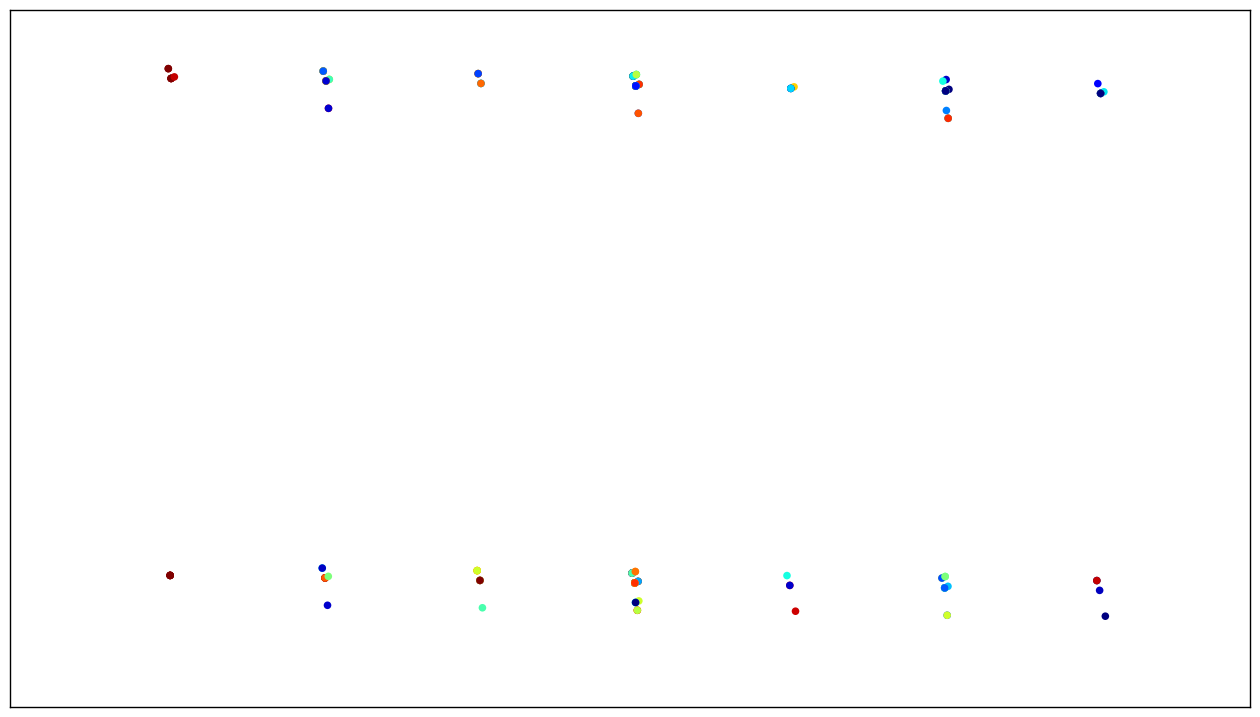

In [71]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter(pca.transform(cluster_features)[:,0],pca.transform(cluster_features)[:,1],c=cluster_colors,edgecolors='none',s=30)

plt.xticks(())
plt.yticks(())

In [4]:
data_csv  = """Season,Name,Female?,Current Residence,From location?,California,Georgia,Texas,Florida,New York,Colorado,Washington,Pennsylvania,Boston,Miami,DC,LA,NYC,Seattle,SF,Las Vegas,Chicago,Age,Quickfire Performance,Elimination 1 Performance,Previous Contestant,Elimination #,"Target
"
13,Karen Akunowicz,1,"Boston, Massachusetts",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,37,-1,0,0,7,0.375
13,Angelina Bastidas,1,"Miami, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,25,-1,-2,0,12,0.6875
13,Carl Dooley,0,"Boston, Massachusetts",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,1,2,0,5,0.25
13,Garret Fleming,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,-1,0,0,17,1
13,Jeremy Ford,0,"Miami, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,1,3,0,1,0
13,Renee Kelly,1,"Merriam, Kansas",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,2,-3,0,16,0.9375
13,Phillip Frankland Lee,0,"Los Angeles, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,28,-1,0,0,8,0.4375
13,Marjorie Meek-Bradley,1,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,-1,0,0,3,0.125
13,Kwame Onwuachi,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,25,-1,0,0,6,0.3125
13,Amar Santana,0,"Orange County, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,2,2,0,2,0.0625
13,Grayson Schmitz,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,32,1,-2,1,14,0.8125
13,Jason Stratton,0,"Seattle, Washington",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,35,1,0,0,10,0.5625
13,Frances Tariga-Weshnak,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,33,2,0,0,15,0.875
13,Isaac Toups,0,"New Orleans, Louisiana",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,36,1,0,0,3,0.125
13,Wesley True,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,38,1,0,0,11,0.625
13,Giselle Wellman,1,"Los Angeles, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,31,-1,0,0,13,0.75
13,Chad White,0,"San Diego, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,-1,0,0,9,0.5
12,Doug Adams,0,"Portland, Oregon",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,29,2,2,0,3,0.1333333333
12,Stacy Cogswell,1,"Boston, Massachusetts",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,0,0,0,10,0.6
12,Joy Crump,1,"Coatesville, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,46,-1,0,0,15,0.9333333333
12,Ron Eyester,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,40,0,0,0,14,0.8666666667
12,Gregory Gourdet,0,"Portland, Oregon",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,39,-1,2,0,2,0.06666666667
12,Aaron Grissom,0,"North Hollywood, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,27,2,0,0,11,0.6666666667
12,Adam Harvey,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,2,0,0,7,0.4
12,Rebecca LaMalfa,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,32,0,0,0,13,0.8
12,Mei Lin,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,3,0,1,0
12,Melissa King,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,30,-1,0,0,4,0.2
12,George Pagonis,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,N/A,-2,0,0,5,0.2666666667
12,Michael Patlazhan,0,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,31,0,-3,0,16,1
12,Keriann Von Raesfeld,1,"San Jose, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,2,0,0,9,0.5333333333
12,James Rigato,0,"White Lake, Michigan",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,29,0,0,0,12,0.7333333333
12,Katsuji Tanabe,0,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,33,0,-2,0,6,0.3333333333
12,Katie Weinner,1,"Salt Lake City, Utah",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,35,0,-2,0,8,0.4666666667
11,"Benedetto ""Bene"" Bartolotta",0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,27,0,0,0,13,0.6666666667
11,Ramon Bojorquez,0,"San Diego, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,31,0,-3,0,19,1
11,Janine Booth,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,25,0,0,0,15,0.7777777778
11,Shirley Chung,1,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,36,0,0,0,3,0.1111111111
11,Jason Cichonski,0,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,27,0,0,0,18,0.9444444444
11,Stephanie Cmar,1,"Boston, Massachusetts",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,0,1,7,0.3333333333
11,Nina Compton,1,"Miami, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,3,0,2,0.05555555556
11,Aaron Cuschieri,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,29,0,-2,0,17,0.8888888889
11,Justin Devillier,0,"New Orleans, Louisiana",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,N/A,0,0,0,9,0.4444444444
11,Nicholas Elmi,0,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,0,0,1,0
11,Carlos Gaytan,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,42,0,0,0,5,0.2222222222
11,Brian Huskey,0,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,0,0,6,0.2777777778
11,Sara Johannes,1,"Minneapolis, Minnesota",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,N/A,0,2,0,11,0.5555555556
11,Louis Maldonado,0,"Healdsburg, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,0,0,4,0.1666666667
11,Travis Masar,0,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,27,0,0,0,10,0.5
11,Carrie Mashaney,1,"Seattle, Washington",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,35,0,2,0,8,0.3888888889
11,Bret Pelaggi,0,"Miami, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,0,0,16,0.8333333333
11,Michael Sichel,0,"New Orleans, Louisiana",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,N/A,0,0,0,14,0.7222222222
11,"Patricia ""Patty"" Vega",1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,0,-2,0,12,0.6111111111
10,"Elizabeth ""Lizzie"" Binder",1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,37,0,0,0,5,0.2352941176
10,Chrissy Camba,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,31,0,0,0,16,0.8823529412
10,Micah Fields,0,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,0,0,8,0.4117647059
10,Eliza Gavin,1,"Telluride, Colorado",0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,38,0,0,0,12,0.6470588235
10,"Chris ""CJ"" Jacobson",0,"Studio City, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,36,0,-2,1,13,0.7058823529
10,Jeffrey Jew,0,"St. Petersburg, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,-3,0,18,1
10,Kristen Kish,1,"Boston, Massachusetts",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,0,0,1,0
10,Danyele McPherson,1,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,31,0,0,0,11,0.5882352941
10,Carla Pellegrino,1,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,43,0,0,0,15,0.8235294118
10,Stefan Richter,0,"Santa Monica, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,40,0,-2,1,6,0.2941176471
10,Sheldon Simeon,0,"Lahaina, Hawaii",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,2,2,0,3,0.1176470588
10,Josie Smith-Malave,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,37,0,-2,1,7,0.3529411765
10,John Tesar,0,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,54,2,2,0,9,0.4705882353
10,"Joshua ""Josh"" Valentine",0,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,0,0,0,4,0.1764705882
10,Bart Vandaele,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,42,0,-2,0,10,0.5294117647
10,Tyler Wiard,0,"Denver, Colorado",0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,41,0,0,0,14,0.7647058824
10,Brooke Williamson,1,"Redondo Beach, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,-2,0,2,0.05882352941
10,Kuniko Yagi,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,35,2,3,0,17,0.9411764706
9,Nyesha Arrington,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,-1,0,11,0.6666666667
9,Lindsay Autry,1,"West Palm Beach, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,29,0,-2,0,3,0.1333333333
9,Ty-LÃ¶r Boring,0,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,34,0,-2,0,8,0.4666666667
9,Chris Crary,0,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,29,0,-1,0,9,0.5333333333
9,Richie Farina,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,28,0,2,0,15,0.9333333333
9,Sarah Grueneberg,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,29,0,-2,0,2,0.06666666667
9,Chris Jones,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,30,0,2,0,7,0.4
9,Beverly Kim,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,32,0,2,0,4,0.2
9,Edward Lee,0,"Louisville, Kentucky",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,38,0,2,0,5,0.2666666667
9,Whitney Otawka,1,"Cumberland Island, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,0,-1,0,13,0.8
9,Paul Qui,0,"Austin, Texas",1,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,31,0,2,0,1,0
9,Keith Rhodes,0,"Wilmington, North Carolina",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,39,0,-3,0,16,1
9,Grayson Schmitz,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,28,0,2,0,6,0.3333333333
9,Heather Terhune,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,39,0,2,0,10,0.6
9,Chuy Valencia,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,25,0,2,0,14,0.8666666667
9,Dakota Weiss,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,35,2,-1,0,12,0.7333333333
8,Elia Aboumrad,1,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,27,0,-3,1,18,1
8,Stephen Asprinio,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,29,0,-2,1,16,0.8823529412
8,Richard Blais,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,38,2,2,1,1,0
8,Jennifer Carroll,1,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,35,0,0,1,17,0.9411764706
8,Tiffany Derry,1,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,27,0,0,1,4,0.1764705882
8,Tiffani Faison,1,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,33,0,0,1,12,0.6470588235
8,Carla Hall,1,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,46,0,0,1,5,0.2352941176
8,Mike Isabella,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,35,0,0,1,2,0.05882352941
8,Jamie Lauren,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,32,0,2,1,11,0.5882352941
8,Dale Levitski,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,37,0,0,1,15,0.8235294118
8,Antonia Lofaso,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,34,2,0,1,3,0.1176470588
8,Spike Mendelsohn,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,29,2,2,1,14,0.7647058824
8,Angelo Sosa,0,"New York, New York",1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,35,0,3,1,7,0.3529411765
8,Dale Talde,0,"New York, New York",1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,32,2,0,1,6,0.2941176471
8,Casey Thompson,1,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,0,1,13,0.7058823529
8,Marcel Vigneron,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,30,0,0,1,10,0.5294117647
8,Fabio Viviani,0,"Moorpark, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,-2,1,8,0.4117647059
8,Tre Wilcox,0,"Cedar Hill, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,0,1,9,0.4705882353
7,Amanda Baumgarten,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,27,0,0,0,6,0.3125
7,Tracey Bloom,1,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,0,0,0,15,0.875
7,Ed Cotton,0,"Queens, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,32,0,0,0,3,0.125
7,Andrea Curto-Randazzo,1,"Miami Beach, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,39,0,0,0,10,0.5625
7,"Timothy ""Tim"" Dean",0,"Baltimore, Maryland",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,39,0,-2,0,12,0.6875
7,Tiffany Derry,1,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,26,0,0,0,5,0.25
7,Lynne Gigliotti,1,"Hyde Park, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,51,0,0,0,14,0.8125
7,Kenny Gilbert,0,"Telluride, Colorado",0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,36,0,2,0,8,0.4375
7,Stephen Hopcraft,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,40,0,-2,0,9,0.5
7,Kelly Liken,1,"Vail, Colorado",0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,0,0,0,4,0.1875
7,Jacqueline Lombard,1,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,33,0,-2,0,16,0.9375
7,Arnold Myint,0,"Nashville, Tennessee",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,0,0,13,0.75
7,Alex Reznik,0,"Hollywood, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,0,2,0,7,0.375
7,Kevin Sbraga,0,"Willingboro, New Jersey",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,0,2,0,1,0
7,John Somerville,0,"West Bloomfield, Michigan",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,42,0,-3,0,17,1
7,Angelo Sosa,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,34,2,3,0,2,0.0625
7,Tamesha Warren,1,"Washington, D.C.",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,24,0,0,0,11,0.625
6,Eve Aronoff,1,"Ann Arbor, Michigan",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,40,0,-2,0,16,0.9375
6,Jennifer Carroll,1,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,2,2,0,4,0.1875
6,Ron Duprat,0,"Naples, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,40,0,2,0,11,0.625
6,Ash Fulk,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,0,0,0,9,0.5
6,Kevin Gillespie,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,26,0,3,0,3,0.125
6,Mike Isabella,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,2,0,7,0.375
6,Eli Kirshtein,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,25,0,0,0,5,0.25
6,Robin Leventhal,1,"Seattle, Washington",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,43,0,0,0,6,0.3125
6,Ashley Merriman,1,"Seattle, Washington",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,32,0,0,0,10,0.5625
6,Preeti Mistry,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,33,0,0,0,15,0.875
6,Mattin Noblia,0,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,29,1,0,0,12,0.6875
6,Jesse Sandlin,1,"Baltimore, Maryland",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,1,-2,0,14,0.8125
6,Hector Santiago,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,41,0,-2,0,13,0.75
6,Bryan Voltaggio,0,"Urbana, Maryland",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,1,0,0,2,0.0625
6,Michael Voltaggio,0,"Pasadena, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,0,0,0,1,0
6,Laurine Wickett,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,38,0,0,0,8,0.4375
6,"Jennifer ""Jen"" Zavala",1,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,31,0,-3,0,17,1
5,Leah Cohen,1,"New York, New York",1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,26,-1,2,0,6,0.3125
5,Radhika Desai,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,28,-1,-1,0,8,0.4375
5,Ariane Duarte,1,"Verona, New Jersey",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,41,2,-2,0,9,0.5
5,Patrick Dunlea,0,"Hyde Park, New York",1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,21,-1,-3,0,16,0.9375
5,Alex Eusebio,0,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,33,1,-1,0,13,0.75
5,Daniel Gagnon,0,"New Hyde Park, New York",1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,26,1,1,0,12,0.6875
5,Carla Hall,1,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,44,2,-1,0,2,0.0625
5,Melissa Harrison,1,"Boulder, Colorado",0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,2,-1,0,11,0.625
5,Lauren Hope,1,"Savannah, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,24,-2,-1,0,17,1
5,Jamie Lauren,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,30,2,1,0,7,0.375
5,"Jeffrey ""Jeff"" McInnis",0,"Miami, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,2,1,0,5,0.25
5,Stefan Richter,0,"Santa Monica, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,35,2,3,0,3,0.125
5,Hosea Rosenberg,0,"Boulder, Colorado",0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,2,1,0,1,0
5,Jill Snyder,1,"Baltimore, Maryland",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,1,1,0,15,0.875
5,Richard Sweeney,0,"San Diego, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,27,2,-1,0,14,0.8125
5,Eugene Villiatora,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,33,1,2,0,10,0.5625
5,Fabio Viviani,0,"Moorpark, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,2,-1,0,4,0.1875
4,Zoi Antonitsas,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,30,-1,-1,0,12,0.7333333333
4,Jennifer Biesty,1,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,35,1,-1,0,10,0.6
4,Richard Blais,0,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,35,1,2,0,3,0.1333333333
4,Valerie Bolon,1,"Chicago, Illinois",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,32,-1,1,0,15,0.9333333333
4,Nikki Cascone,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,35,-1,2,0,8,0.4666666667
4,Andrew D'Ambrosi,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,30,-1,-1,0,7,0.4
4,Lisa Fernandes,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,27,-1,1,0,2,0.06666666667
4,Erik Hopfinger,0,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,38,1,-2,0,14,0.8666666667
4,Stephanie Izard,1,"Chicago, Illinois",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,31,-1,3,0,1,0
4,Antonia Lofaso,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,31,1,2,0,4,0.2
4,Spike Mendelsohn,0,"Washington, D.C.",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,27,1,-1,0,5,0.2666666667
4,Nimma Osman,1,"Atlanta, Georgia",0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,26,-1,-3,0,16,1
4,Mark Simmons,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,1,-2,0,9,0.5333333333
4,Ryan Scott,0,"San Francisco, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,28,1,-2,0,11,0.6666666667
4,Dale Talde,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,1,1,0,6,0.3333333333
4,Manuel Trevino,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,33,-1,-1,0,13,0.8
3,Lia Bardeen,1,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,28,0,0,0,11,0.7142857143
3,Camille Becerra,1,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,34,0,0,0,12,0.7857142857
3,Sandee Birdsong,1,"Miami Beach, Florida",1,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,39,0,0,0,14,0.9285714286
3,Clay Bowen,0,"Santa Barbara, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,-3,0,15,1
3,Micah Edelstein,0,"Boca Raton, Florida",1,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,33,2,0,0,13,0.8571428571
3,Hung Huynh,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,29,0,2,0,1,0
3,"Chris ""CJ"" Jacobson",0,"Venice, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,31,0,0,0,6,0.3571428571
3,Howie Kleinberg,0,"Miami, Florida",1,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,31,0,-2,0,7,0.4285714286
3,Dale Levitski,0,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,34,0,-2,0,2,0.07142857143
3,Sara Mair,1,"Miami, Florida",1,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,0,0,5,0.2857142857
3,Brian Malarkey,0,"San Diego, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,34,0,-2,0,4,0.2142857143
3,Sara Nguyen,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,25,0,0,0,9,0.5714285714
3,Joey Paulino,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,0,0,0,10,0.6428571429
3,Casey Thompson,0,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,29,0,0,0,3,0.1428571429
3,Tre Wilcox,0,"Cedar Hill, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,30,0,3,0,8,0.5
2,Elia Aboumrad,1,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,23,-1,2,0,4,0.2142857143
2,Otto Borsich,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,46,0,-2,0,14,0.9285714286
2,Marisa Churchill,1,"San Francisco, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,28,0,0,0,12,0.7857142857
2,Cliff Crooks,0,"West Caldwell, New Jersey",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,0,0,5,0.2857142857
2,Carlos Fernandez,0,"Fort Lauderdale, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,36,-1,-2,0,10,0.6428571429
2,Betty Fraser,1,"Los Angeles, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,44,1,2,0,7,0.4285714286
2,Mia Gaines-Alt,1,"Oakdale, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,32,0,2,0,8,0.5
2,Ilan Hall,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,24,0,3,0,1,0
2,Michael Midgley,0,"Lodi, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,28,0,0,0,6,0.3571428571
2,Josie Smith-Malave,1,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,31,0,0,0,11,0.7142857143
2,Emily Sprissler,1,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,30,1,0,0,13,0.8571428571
2,Suyai Steinhauer,1,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,29,-1,-3,0,15,1
2,Sam Talbot,0,"New York, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,28,2,0,0,3,0.1428571429
2,Frank Terzoli,0,"San Diego, California",1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,39,0,0,0,9,0.5714285714
2,Marcel Vigneron,0,"Las Vegas, Nevada",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,26,0,-2,0,2,0.07142857143
14,Silvia Barban,1,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,27,1,-1,0,,
14,Emily Hahn,1,"Charleston, South Carolina",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,1,-1,0,,
14,Jamie Lynch,0,"Charlotte, North Carolina",1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,-1,-2,0,,
14,Annie Pettry,1,"Louisville, Kentucky",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,-1,-3,0,,
14,Sylva Senat,0,"Philadelphia, Pennsylvania",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,0,-1,0,,
14,BJ Smith,0,"Portland, Oregon",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,0,-2,0,,
14,Jim Smith,0,"Montgomery, Alabama",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,2,-1,0,,
14,Gerald Sombright,0,"Marco Island, Florida",0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,-3,-1,0,,
14,Amanda Baumgarten,1,"Chicago, Illinois",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,,0,1,1,,
14,Shirley Chung,1,"Orange County, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,0,1,1,,
14,Sheldon Simeon,0,"Lahaina, Hawaii",0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,0,2,1,,
14,Sam Talbot,0,"Brooklyn, New York",0,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,,0,1,1,,
14,Katsuji Tanabe,0,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,,0,1,1,,
14,John Tesar,0,"Dallas, Texas",0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,-2,2,1,,
14,Casey Thompson,1,"Napa Valley, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,,0,3,1,,
14,Brooke Williamson,1,"Los Angeles, California",0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,,2,1,1,,"""